In [151]:
# imports
%matplotlib inline
import requests
import pandas as pd
import json
import pdb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

In [206]:
# load data
df = pd.read_csv('/Users/flatironschool/Documents/kicks.csv')
df.head(15)

,Kicker Name,WORLD CUP DETAILS,Year,Location,GAME DETAILS,Attendance,Weather,League round,Time of day,KEEPER DETAILS,...,Keeper Play,Post (y/n),FOR LATER PROJECT,GOLDEN BALL?,Home/Away,Lead/Deficit,FIFA pk rating,PES pk rating,Games missed,UCL experience
0,Giresse,NaN,1982,Spain,NaN,70000,99 f,Semi Finals,9:00 PM,NaN,...,Right,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kaltz,NaN,1982,Spain,NaN,70000,99 f,Semi Finals,9:00 PM,NaN,...,Left,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Amoros,NaN,1982,Spain,NaN,70000,99 f,Semi Finals,9:00 PM,NaN,...,Left,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Breitner,NaN,1982,Spain,NaN,70000,99 f,Semi Finals,9:00 PM,NaN,...,Left,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rocheteau,NaN,1982,Spain,NaN,70000,99 f,Semi Finals,9:00 PM,NaN,...,Left,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Stielike,NaN,1982,Spain,NaN,70000,99 f,Semi Finals,9:00 PM,NaN,...,Left,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Six,NaN,1982,Spain,NaN,70000,99 f,Semi Finals,9:00 PM,NaN,...,Left,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Littbarski,NaN,1982,Spain,NaN,70000,99 f,Semi Finals,9:00 PM,NaN,...,Right,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Platini,NaN,1982,Spain,NaN,70000,99 f,Semi Finals,9:00 PM,NaN,...,Left,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Rummenigge,NaN,1982,Spain,NaN,70000,99 f,Semi Finals,9:00 PM,NaN,...,Middle,no,NaN,Bronze,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
# columns in data
df.columns

Index(['Kicker Name', 'WORLD CUP DETAILS', 'Year', 'Location', 'GAME DETAILS',
       'Attendance', 'Weather', 'League round', 'Time of day',
       'KEEPER DETAILS', 'Keeper', 'Keeper height (m)', 'PLAYER DETAILS',
       'Club', 'Nationality', 'Captain', 'Number', 'Age', 'Role', 'Position',
       'Dominant foot', 'Player height (m)', 'Player weight (kg)',
       'PLAYER IN-GAME STATS', 'Minutes played', 'Goals scored',
       'Yellow card (y/n)', 'Team red card (y/n)', 'SHOOTOUT FACTS', 'Kick #',
       'Game On Line (y/n)', 'Deficit/Lead (SO)', 'Direction', 'Result',
       'Keeper Play', 'Post (y/n)', 'FOR LATER PROJECT', 'GOLDEN BALL?',
       'Home/Away', 'Lead/Deficit', 'FIFA pk rating', 'PES pk rating',
       'Games missed ', 'UCL experience'],
      dtype='object')

In [153]:
# keeper height dictionary
k_h_dict = {}
for k in df['Keeper'].unique():
    k_h_dict[k] = list(df.loc[df['Keeper']==k]['Keeper height (m)'])[0]

In [154]:
# data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
# preview of data
df.head()

,Kicker Name,WORLD CUP DETAILS,Year,Location,GAME DETAILS,Attendance,Weather,League round,Time of day,KEEPER DETAILS,...,Keeper Play,Post (y/n),FOR LATER PROJECT,GOLDEN BALL?,Home/Away,Lead/Deficit,FIFA pk rating,PES pk rating,Games missed,UCL experience
0,Giresse,NaN,1982,Spain,NaN,70000,99 f,Semi Finals,9:00 PM,NaN,...,Right,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kaltz,NaN,1982,Spain,NaN,70000,99 f,Semi Finals,9:00 PM,NaN,...,Left,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Amoros,NaN,1982,Spain,NaN,70000,99 f,Semi Finals,9:00 PM,NaN,...,Left,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Breitner,NaN,1982,Spain,NaN,70000,99 f,Semi Finals,9:00 PM,NaN,...,Left,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rocheteau,NaN,1982,Spain,NaN,70000,99 f,Semi Finals,9:00 PM,NaN,...,Left,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
# distribtuion of shot directions
(df['Direction']).value_counts()

Bottom Left     32
Top Left        29
Bottom Right    24
Top Right       20
Middle          13
###             12
MIddle           2
 Bottom Left     1
 Top Right       1
Name: Direction, dtype: int64

In [163]:
# preparing labels and numbers for a bar graph
directions = ['BL', 'TL', 'M', 'BR', 'TR']
frequency = [33,29,15,24,21]

Text(0, 0.5, 'frequency')

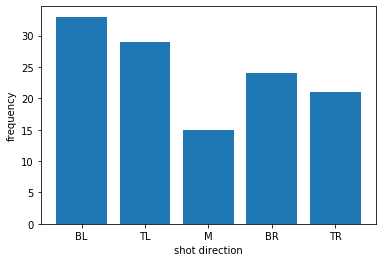

In [168]:
# shot direction distribution
plt.bar(directions,frequency)
plt.xlabel('shot direction')
plt.ylabel('frequency')

In [196]:
# generating subsets for shots taken in different directions
df_mid =df[(df['Direction']=='Middle')|(df['Direction']=='MIddle')]
df_tr = df[(df['Direction']=='Top Right')|(df['Direction']=='  Top Right')]
df_br = df[(df['Direction']=='Bottom Right')]
df_tl = df[(df['Direction']=='Top Left')|(df['Direction']=='  Top Left')]
df_bl = df[(df['Direction']=='Bottom Left')]

In [173]:
# reminder of features
df.columns

Index(['Kicker Name', 'Year', 'Location', 'Attendance', 'Weather',
       'League round', 'Time of day', 'Keeper', 'Keeper height (m)', 'Club',
       'Nationality', 'Captain', 'Number', 'Age', 'Role', 'Position',
       'Dominant foot', 'Player height (m)', 'Player weight (kg)',
       'Minutes played', 'Goals scored', 'Yellow card (y/n)',
       'Team red card (y/n)', 'Kick #', 'Game On Line (y/n)',
       'Deficit/Lead (SO)', 'Direction', 'Result', 'Keeper Play', 'Post (y/n)',
       'GOLDEN BALL?'],
      dtype='object')

In [170]:
#df.drop(['WORLD CUP DETAILS','GAME DETAILS','KEEPER DETAILS','PLAYER DETAILS','PLAYER IN-GAME STATS','SHOOTOUT FACTS','FOR LATER PROJECT','Home/Away','Lead/Deficit','FIFA pk rating','PES pk rating','Games missed ','UCL experience'],axis=1,inplace=True)

In [172]:
# preview of data
df.head()

,Kicker Name,Year,Location,Attendance,Weather,League round,Time of day,Keeper,Keeper height (m),Club,...,Yellow card (y/n),Team red card (y/n),Kick #,Game On Line (y/n),Deficit/Lead (SO),Direction,Result,Keeper Play,Post (y/n),GOLDEN BALL?
0,Giresse,1982,Spain,70000,99 f,Semi Finals,9:00 PM,Schumacher,1.73,Bordeaux,...,YES,no,1,no,0-0,Bottom Left,Goal,Right,no,NaN
1,Kaltz,1982,Spain,70000,99 f,Semi Finals,9:00 PM,Ettori,1.86,Hamburg,...,no,no,2,no,0-1,Bottom Right,Goal,Left,no,NaN
2,Amoros,1982,Spain,70000,99 f,Semi Finals,9:00 PM,Schumacher,1.73,Monaco,...,no,no,3,no,1-1,Top Right,Goal,Left,no,NaN
3,Breitner,1982,Spain,70000,99 f,Semi Finals,9:00 PM,Ettori,1.86,Munich,...,no,no,4,no,1-2,Top Right,Goal,Left,no,NaN
4,Rocheteau,1982,Spain,70000,99 f,Semi Finals,9:00 PM,Schumacher,1.73,PSG,...,no,no,5,no,2-2,Bottom Right,Goal,Left,no,NaN


In [199]:
# shots taken to the top right results
df_tr['Result'].value_counts()/df_tr.shape[0]

Goal     0.8
Saved    0.1
Miss     0.1
Name: Result, dtype: float64

In [200]:
# shots taken to the bottom right results
df_br['Result'].value_counts()/df_br.shape[0]

Goal     0.75
Saved    0.25
Name: Result, dtype: float64

In [201]:
# shots taken to the top left results
df_tl['Result'].value_counts()/df_tl.shape[0]

Goal     0.724138
Saved    0.137931
Miss     0.137931
Name: Result, dtype: float64

In [202]:
# shots taken to the bottom left results
df_bl['Result'].value_counts()/df_bl.shape[0]

Goal     0.59375
Saved    0.40625
Name: Result, dtype: float64

In [197]:
# shots taken to the middle results
df_mid['Result'].value_counts()/df_mid.shape[0]

Goal     0.800000
Miss     0.133333
Saved    0.066667
Name: Result, dtype: float64

In [195]:
# shape of data frame
df.shape

(134, 31)

In [194]:
# data shape of shots that completely missed
df_miss.shape

(8, 31)

In [189]:
# data where the game was on the line
df_gameonline = df[df['Game On Line (y/n)']=='YES']

In [191]:
# data where game was on the line and results
df_gameonline['Result'].value_counts()

Goal     5
Saved    4
Miss     3
###      1
Name: Result, dtype: int64

In [125]:
# average kick accuracy
print('average kick percent')
df['Result'].value_counts()[0]/(df.shape[0])

average kick percent


0.7238805970149254

In [126]:
# data where one teammate at least had a yellow card
df_yellow = df[df['Yellow card (y/n)']=='YES']

In [127]:
# kick percent with a yellow card in play
print('effect of yellow cards on pk percent')
df_yellow['Result'].value_counts()[0]/18

effect of yellow cards on pk percent


0.7222222222222222

In [128]:
# data frame where a team got red carded
df_red = df[df['Team red card (y/n)']=='YES']

In [129]:
# effect of teams that got a red card
print('effect of red cards on pk percent')
df_red['Result'].value_counts()[0]/(df_red.shape[0])

effect of red cards on pk percent


0.6571428571428571

In [130]:
# getting average of goalkeepers
keep_mean = df['Keeper height (m)'].mean()

In [131]:
# splitting data into taller and shorter keepers
df_low_keeper = df[df['Keeper height (m)']<keep_mean]
df_high_keeper = df[df['Keeper height (m)']>=keep_mean]

In [203]:
# stats comparing tall and short keepers
print('short keeper save percent')
print(df_low_keeper['Result'].value_counts()/(df_low_keeper.shape[0]))
print('tall keeper save percent')
print(df_high_keeper['Result'].value_counts()/(df_high_keeper.shape[0]))

short keeper save percent
Goal     0.630769
Saved    0.276923
Miss     0.076923
###      0.015385
Name: Result, dtype: float64
tall keeper save percent
Goal     0.811594
Saved    0.115942
Miss     0.043478
###      0.028986
Name: Result, dtype: float64


In [133]:
# distribution of nationality
df['Nationality'].value_counts('')

France         16
Italy          15
Argentina      14
Germany        14
Brazil         13
Romania        11
England        10
Mexico          7
Sweden          6
Spain           5
Belgium         5
Yugoslavia      5
Ireland         5
Netherlands     4
Bulgaria        4
Name: Nationality, dtype: int64

In [68]:
# data sorted by nationality
df_sort = df.sort_values(by = 'Nationality')

In [94]:
# information on the netherlands
print(len(df_sort.loc[(df_sort['Nationality']=='Netherlands')]['Result']))
df_sort.loc[(df_sort['Nationality']=='Netherlands')]['Result']

4


127     Goal
129     Goal
131    Saved
133    Saved
Name: Result, dtype: object

In [98]:
# results by nationality
result_dict={'arg':11/14,'bel':5/5,'bul':3/4,'bra':10/13,'fra':12/16,'ita':8/15,'ger':13/14,'rom':8/11,'eng':7/10,'mex':2/7,'swe':5/6,'spa':4/5,'yug':3/5,'ire':5/5,'net':2/4}

In [112]:
# results by country in percentages
print(list(result_dict.values()))
print("")
print("")
print('the average is')
print(np.mean(list(result_dict.values())))
print("")
print("")
print('there are about 7 outliers out of 15 countries')

[0.7857142857142857, 1.0, 0.75, 0.7692307692307693, 0.75, 0.5333333333333333, 0.9285714285714286, 0.7272727272727273, 0.7, 0.2857142857142857, 0.8333333333333334, 0.8, 0.6, 1.0, 0.5]


the average is
0.7308780108780109


there are about 7 outliers out of 15 countries


In [177]:
# stats of captains of teams
df_cap = df[df['Captain']=='YES']
df_cap['Result'].value_counts()/df_cap.shape[0]

Goal     0.750000
Miss     0.166667
Saved    0.083333
Name: Result, dtype: float64

In [178]:
# stats of midfielders of teams
df_mid = df[df['Role']=='M']
df_mid['Result'].value_counts()/df_mid.shape[0]

Goal     0.680556
Saved    0.194444
Miss     0.097222
###      0.027778
Name: Result, dtype: float64

In [182]:
# stats of defensemen of teams
df_def = df[df['Role']=='D']
df_def['Result'].value_counts()/df_def.shape[0]

Goal     0.714286
Saved    0.214286
Miss     0.035714
###      0.035714
Name: Result, dtype: float64

In [183]:
# stats of forwards of teams
df_for = df[df['Role']=='F']
df_for['Result'].value_counts()/df_for.shape[0]

Goal     0.823529
Saved    0.176471
Name: Result, dtype: float64

In [184]:
# stats when people play the whole game
df_120 = df[df['Minutes played']==120]
df_120['Result'].value_counts()/df_120.shape[0]

Goal     0.706422
Saved    0.201835
Miss     0.064220
###      0.027523
Name: Result, dtype: float64

In [185]:
# stats of subs
df_sub = df[df['Minutes played']!=120]
df_sub['Result'].value_counts()/df_sub.shape[0]

Goal     0.80
Saved    0.16
Miss     0.04
Name: Result, dtype: float64

In [ ]:
# Number Age Dominant foot

In [186]:
df_right = df[df['Dominant foot']=='Right']
df_right['Result'].value_counts()/df_right.shape[0]

Goal     0.715686
Saved    0.205882
Miss     0.049020
###      0.029412
Name: Result, dtype: float64

In [187]:
# stats on lefties
df_left = df[df['Dominant foot']!='Right']
df_left['Result'].value_counts()/df_left.shape[0]

Goal     0.75000
Saved    0.15625
Miss     0.09375
Name: Result, dtype: float64